# Linear Regression

- [Simple Linear Regression](#Simple-Linear-Regression)
- [Multiple Linear Regression](#Multiple-Linear-Regression)
- [Interaction Terms](#Interaction-Terms)
- [Non-linear Transformations of the Predictors](#Non-linear-Transformations-of-the-Predictors)
- [Qualitative Predictors](#Qualitative-Predictors)

In [1]:
# perform imports and set-up

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston # boston data set is part of sklearn
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
# plt.style.use('ggplot') # emulate pretty r-style plots

/home/gperaza/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Simple Linear Regression

The Boston data set is part of the `sklearn` module. This data set records `medv` (median house value) for 506 neighborhoods around Boston. We will seek to predict `medv` using 13 predictors such as `rm` (average number of rooms per house), `age` (average age of houses), and `lstat` (percent of households with low socioeconomic status).

In [2]:
# Load Boston housing data set
boston = load_boston()

#Transform the data into a dataframe for analysis¶

# combine the predictors and responses for a dataframe
predictors = boston.data
response = boston.target
boston_data = np.column_stack([predictors,response])

# now get the column names of the data frame
col_names = np.append(boston.feature_names, 'MEDV')

# create the data frame
boston_df = pd.DataFrame(boston_data, columns = col_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

We will start by using the `statsmodels` module to fit a simple linear regression model, with `medv` as the response and `lstat` as the predictor. The basic syntax is `smf.ols('y~x', data)`, where `y` is the response, `x` the predictor, and `data` is the data frame in which these two variables are kept.

In [4]:
lm_fit = smf.ols('MEDV~LSTAT', boston_df).fit()

To print some information about the model, we use the `summary()` method. This gives us p-values and standard errors for the coefficients, as well as the $R^2$ statistic and F-statistic for the model.

In [5]:
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 16 Jan 2018   Prob (F-statistic):           5.08e-88
Time:                        11:18:27   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can access many of this values directly, for example, to get a list of the parameters:

In [6]:
lm_fit.params

Intercept    34.553841
LSTAT        -0.950049
dtype: float64

In order to obtain a 95% confidence interval for the coefficient estimates, we can use the `conf_int()` method.

In [10]:
lm_fit.conf_int(alpha=0.05)

,0,1
Intercept,33.448457,35.659225
LSTAT,-1.026148,-0.873951


The fitted values of the model are stored in

In [11]:
lm_fit.fittedvalues

0      29.822595
1      25.870390
2      30.725142
3      31.760696
4      29.490078
5      29.604084
6      22.744727
7      16.360396
8       6.118864
9      18.307997
10     15.125332
11     21.946686
12     19.628566
13     26.706433
14     24.806335
15     26.506923
16     28.302516
17     20.616617
18     23.447764
19     23.837284
20     14.583803
21     21.414658
22     16.768917
23     15.666860
24     19.068036
25     18.868526
26     20.483610
27     18.136988
28     22.393209
29     23.172250
         ...    
476    16.806919
477    10.888111
478    17.424451
479    22.098694
480    24.350311
481    27.200459
482    27.893995
483    24.654327
484    21.880183
485    24.502319
486    20.322102
487    23.675776
488    17.395950
489    11.781158
490     6.356376
491    17.386449
492    21.870682
493    23.143748
494    21.642670
495    17.832972
496    14.469798
497    21.158145
498    22.279203
499    20.208096
500    20.939634
501    25.366864
502    25.927393
503    29.1955

The `statsmodels` module can be used to produce confidence intervals and prediction intervals for the prediction of `medv` for a given value of `lstat` (predictions).

In [12]:
predictors = pd.DataFrame({'LSTAT':[5,10,15]})
predictions = lm_fit.get_prediction(predictors)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459


For instance, the 95 % confidence interval associated with a lstat value of 10 is (24.47, 25.63), and the 95 % prediction interval is (12.828, 37.28). As expected, the confidence and prediction intervals are centered around the same point (a predicted value of 25.05 for medv when lstat equals 10), but the latter are substantially wider.

We will now plot medv and lstat along with the least squares regression line using the plot() function.

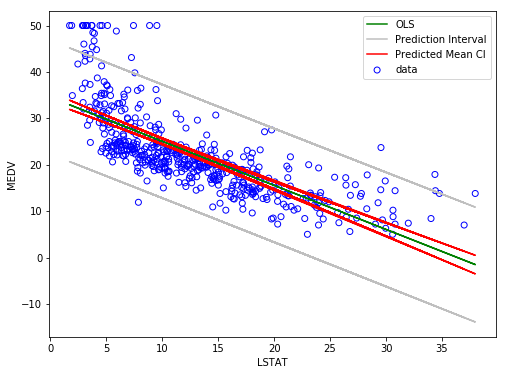

In [13]:
# Create a plot to plot the data, OLS estimate, prediction and confidence intervals
fig, ax = plt.subplots(figsize=(8,6))

# get numpy array values from dataframe
x = boston_df.LSTAT

# Plot the data
ax.scatter(x, boston_df.MEDV, facecolors='none', edgecolors='b', label="data")
# plot the models fitted values
ax.plot(x, lm_fit.fittedvalues, 'g', label="OLS")

# To plot prediction and confidence intrvals we need predictions for all data points
predictions = lm_fit.get_prediction(boston_df).summary_frame(alpha=0.05)

# plot the high and low prediction intervals
ax.plot(x, predictions.obs_ci_lower, color='0.75', label="Prediction Interval")
ax.plot(x, predictions.obs_ci_upper, color='0.75', label="")

# plot the high and low mean confidence intervals
ax.plot(x, predictions.mean_ci_lower, color='r',label="Predicted Mean CI")
ax.plot(x, predictions.mean_ci_upper, color='r', label="")

ax.legend(loc='best');

plt.xlabel('LSTAT');
plt.ylabel('MEDV');

Next we examine some diagnostic plots, several of which were discussed in Section 3.3.3. Three important diagnostic plots are implemented below:

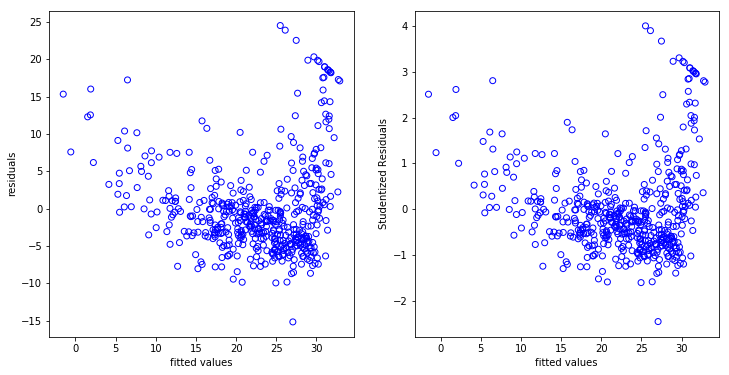

In [14]:
# We need this for leverage and studentized residuilas calculations.
from statsmodels.stats.outliers_influence import OLSInfluence
influence = OLSInfluence(lm_fit)
leverage = influence.hat_matrix_diag
stud_res = influence.resid_studentized_external

# Create plots of residuals
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

# Plot the residual for each fitted value
ax1.scatter(lm_fit.fittedvalues, lm_fit.resid, facecolors='none', edgecolors='b');
ax1.set_xlabel('fitted values');
ax1.set_ylabel('residuals');
# The residual plot indicates significant nonlinearity (a u-shape pattern is clear)

# Plot the studentized residuals
ax2.scatter(lm_fit.fittedvalues, stud_res, facecolors='none', edgecolors='b');
ax2.set_ylabel('Studentized Residuals');
ax2.set_xlabel('fitted values');

# |studentized residual| > 3 are generally considered outliers

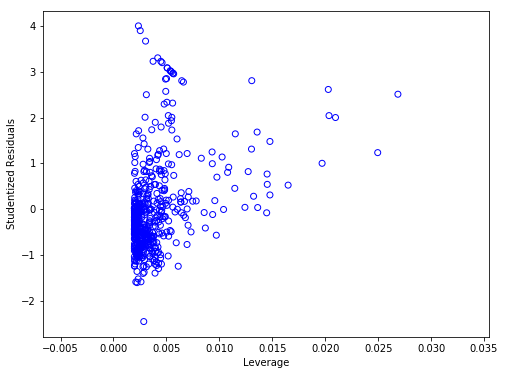

In [15]:
# We can also examine the leverages to identify points that may alter the regression line

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(leverage, stud_res,facecolors='none', edgecolors='b');
ax.set_xlabel('Leverage');
ax.set_ylabel('Studentized Residuals');

To asses the normality of the residuals we can use a Normal Probability plot.

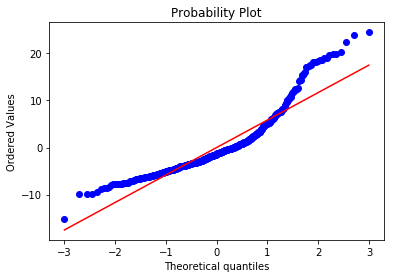

In [16]:
from scipy.stats import probplot

_ = probplot(lm_fit.resid, plot=plt)

## Multiple Linear Regression

In order to fit a multiple linear regression model using least squares, we again use the statsmodels module. The syntax `smf.ols('y~x1+x2+x3, data)` is used to fit a model with three predictors, `x1`, `x2`, and `x3`. The `summary()` function now outputs the regression coefficients for all the predictors.

In [ ]:
lm_fit = smf.ols('MEDV~LSTAT+AGE', boston_df).fit()
lm_fit.summary()

The `Boston` data set contains 13 variables, and so it would be cumbersome to have to type all of these in order to perform a regression using all of the predictors. Instead, we can use the following short-hand:

In [ ]:
preds = list(boston_df.columns)
preds.remove('MEDV')
my_formula = 'MEDV~' + '+'.join(preds)
my_formula

In [ ]:
lm_ins = smf.ols(my_formula, boston_df)
lm_fit = lm_ins.fit()
lm_fit.summary()

We can access the individual components of a summary object by name.

In [ ]:
# This gives us the R^2
lm_fit.rsquared

In [ ]:
# This gives us the RSE
np.sqrt(lm_fit.mse_resid)

statsmodels can also be used to compute variance inflation factors. Most VIF’s are low to moderate for this data.

One recommendation is that if VIF is greater than 5, then the explanatory variable is highly collinear with the other explanatory variables, and the parameter estimates will have large standard errors because of this.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# exog is the predictor matrix of the model
VIFs = [(predictor, variance_inflation_factor(lm_ins.exog, idx)) 
        for (idx, predictor) in enumerate(lm_ins.exog_names)]

print('Variance Inflation Factors')
for tup in VIFs:
    print('{:10}'.format(tup[0]), '{:.3f}'.format(tup[1]))

What if we would like to perform a regression using all of the variables but one? For example, in the above regression output, age has a high p-value. So we may wish to run a regression excluding this predictor. The following syntax results in a regression using all predictors except age.

In [ ]:
preds = list(boston_df.columns)
preds.remove('MEDV')
preds.remove('AGE')
my_formula = 'MEDV~' + '+'.join(preds)
my_formula

In [ ]:
lm_ins1 = smf.ols(my_formula, boston_df)
lm_fit1 = lm_ins1.fit()
lm_fit1.summary()

## Interaction Terms

It is easy to include interaction terms in a linear model. The syntax lstat:black tells statsmodels to include an interaction term between lstat and black. The syntax lstat*age simultaneously includes lstat, age,
and the interaction term lstat×age as predictors; it is a shorthand for lstat+age+lstat:age.

In [ ]:
smf.ols(formula='MEDV ~ LSTAT*AGE', data=boston_df).fit().summary()

## Non-linear Transformations of the Predictors

statsmodel can also accommodate non-linear transformations of the predictors. For instance, given a predictor $X$, we can create a predictor $X^2$ using `I(X**2)`.

In [ ]:
lm_fit2 = smf.ols('MEDV ~ LSTAT + I(LSTAT**2)', boston_df).fit()
lm_fit2.summary()

The near-zero p-value associated with the quadratic term suggests that it leads to an improved model. We use the anova_lm() function to further quantify the extent to which the quadratic fit is superior to the linear fit.

In [ ]:
# import anova function
from statsmodels.stats.api import anova_lm

lm_fit = smf.ols('MEDV ~ LSTAT', boston_df).fit()
lm_fit2 = smf.ols('MEDV ~ LSTAT + I(LSTAT**2)', boston_df).fit()

# perform the hypothesis test (see https://en.wikipedia.org/wiki/F-test regression section)
anova_lm(lm_fit, lm_fit2)

Here Model 1 represents the linear submodel containing only one predictor, lstat, while Model 2 corresponds to the larger quadratic model that has two 2 predictors, lstat and lstat^2. The anova_lm() function performs a hypothesis test comparing the two models. The null hypothesis is that the two models fit the data equally well, and the alternative hypothesis is that the full model is superior. Here the F-statistic is 135 and the associated p-value is virtually zero. This provides very clear evidence that the model containing the predictors lstat and lstat2 is far superior to the model that only
contains the predictor lstat . This is not surprising, since earlier we saw evidence for non-linearity in the relationship between medv and lstat. If we plot the residuals for Model 2, there is little discernible pattern in the residuals.

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

# Plot the data
ax.scatter(boston_df.LSTAT, boston_df.MEDV, facecolors='none', edgecolors='b', label="data");
# plot the models fitted values
ax.plot(boston_df.LSTAT, lm_fit2.fittedvalues, 'g', marker='o',linestyle='none', label="OLS");

ax.legend(loc='best');

plt.xlabel('LSTAT');
plt.ylabel('MEDV');

In [ ]:
# Create plots of residuals
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

# Plot the residual for each fitted value for the linear model
ax1.scatter(lm_fit.fittedvalues, lm_fit.resid, facecolors='none', edgecolors='b');
ax1.set_xlabel('fitted values');
ax1.set_ylabel('residuals');
ax1.set_title('Linear Model Residuals')

ax2.scatter(lm_fit2.fittedvalues, lm_fit2.resid, facecolors='none', edgecolors='b');
ax2.set_title('Quadratic Model Residuals');

In order to create a cubic fit, we can include a predictor of the form I(X**3). However, this approach can start to get cumbersome for higher-order polynomials. A better approach is the following:

In [ ]:
formula = 'MEDV ~ LSTAT +' + ' + '.join('I(LSTAT**{})'.format(i) for i in range(2, 6))
formula

In [ ]:
lm_fit5 = smf.ols(formula, boston_df).fit()
lm_fit5.summary()

This suggests that including additional polynomial terms, up to fifth order, leads to an improvement in the model fit! However, further investigation of the data reveals that no polynomial terms beyond fifth order have significant p-values in a regression fit.

Of course, we are in no way restricted to using polynomial transformations of the predictors. Here we try a log transformation.

In [ ]:
smf.ols('MEDV ~ np.log(LSTAT)', boston_df).fit().summary()

## Qualitative Predictors

We will now examine the Carseats data. We will attempt to predict Sales (child car seat sales) in 400 locations
based on a number of predictors.

In [ ]:
carseats_df = pd.read_csv('Data/Carseats.csv', index_col = 0)
carseats_df.head()

The Carseats data includes qualitative predictors such as `ShelveLoc`, an indicator of the quality of the shelving location—that is, the space within a store in which the car seat is displayed—at each location. The predictor `ShelveLoc` takes on three possible values, Bad, Medium, and Good.

Given a qualitative variable such as `Shelveloc`, `statsmodels` generates dummy variables automatically. Below we fit a multiple regression model that includes some interaction terms.

In [ ]:
# Construct the formula with two interaction terms
preds = carseats_df.columns.tolist()[1:]
formula ='Sales ~ ' + ' + '.join(preds) + ' + Income:Advertising + Price:Age'
formula

In [ ]:
lm_fit = smf.ols(formula, carseats_df).fit()
lm_fit.summary()

R has created a ShelveLoc[T.Good] dummy variable that takes on a value of 1 if the shelving location is good, and 0 otherwise. It has also created a ShelveLoc[T.Medium] dummy variable that equals 1 if the shelving location is medium, and 0 otherwise. A bad shelving location corresponds to a zero for each of the two dummy variables. The fact that the coefficient for ShelveLoc[T.Good] in the regression output is positive indicates that a good shelving location is associated with high sales (relative to a bad location). And ShelveLoc[T.Medium] has a smaller positive coefficient, indicating that a medium shelving location leads to higher sales than a bad shelving location but lower sales than a good shelving location.